In [520]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix

In [521]:
df=pd.read_csv('Bank Customer Churn.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [522]:
df.shape

(10000, 12)

In [523]:
df.drop('customer_id',axis=1,inplace=True)

In [524]:
df.shape

(10000, 11)

In [525]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [527]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [528]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [529]:
tenure_churn_yes=df[df['churn']==1]['tenure']
tenure_churn_no=df[df['churn']==0]['tenure']

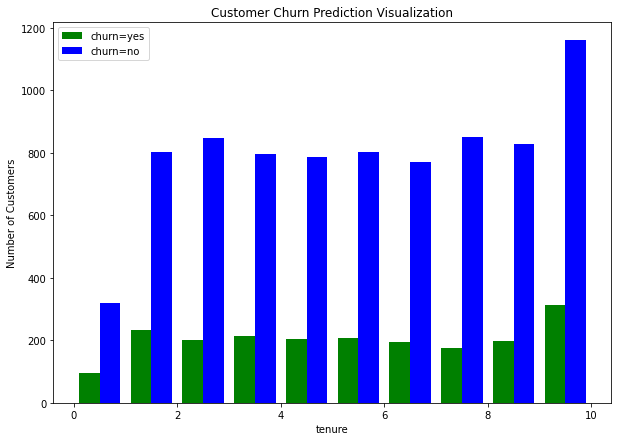

In [530]:
plt.figure(figsize=(10,7))
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','blue'],label=['churn=yes','churn=no'])
plt.legend()
plt.show()

In [531]:
balance_churn_yes=df[df['churn']==1]['balance']
balance_churn_no=df[df['churn']==0]['balance']

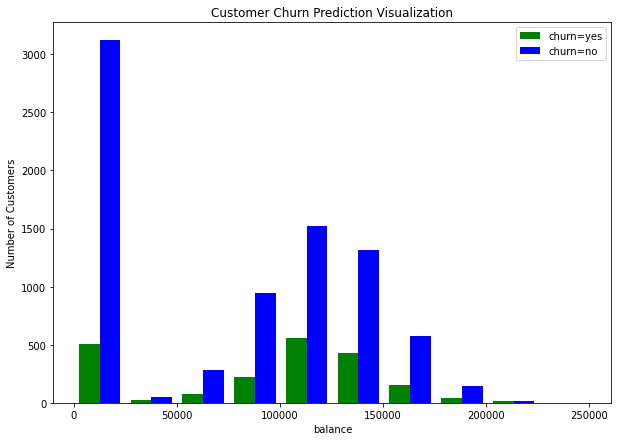

In [532]:
plt.figure(figsize=(10,7))
plt.xlabel('balance')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([balance_churn_yes,balance_churn_no],color=['green','blue'],label=['churn=yes','churn=no'])
plt.legend()
plt.show()

In [533]:
creditcard_churn_yes=df[df['churn']==1]['credit_card']
creditcard_churn_no=df[df['churn']==0]['credit_card']

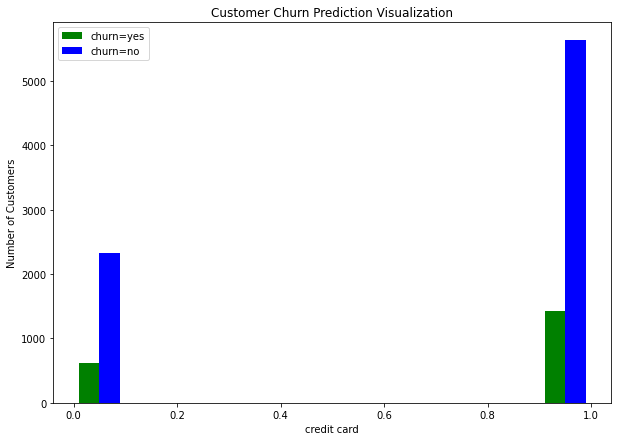

In [534]:
plt.figure(figsize=(10,7))
plt.xlabel('credit card')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([creditcard_churn_yes,creditcard_churn_no],color=['green','blue'],label=['churn=yes','churn=no'])
plt.legend()
plt.show()

In [535]:
activemember_churn_yes=df[df['churn']==1]['active_member']
activemember_churn_no=df[df['churn']==0]['active_member']

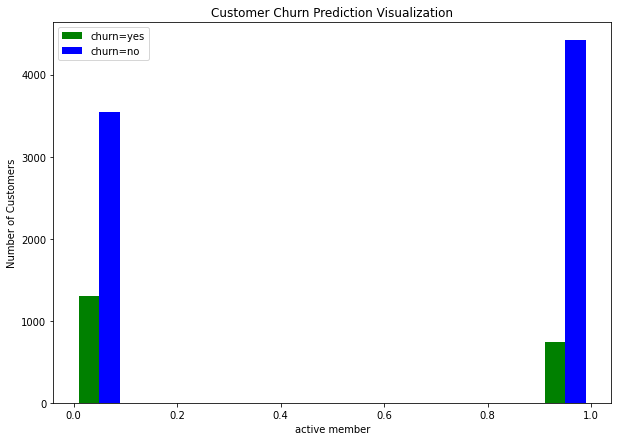

In [536]:
plt.figure(figsize=(10,7))
plt.xlabel('active member')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([activemember_churn_yes,activemember_churn_no],color=['green','blue'],label=['churn=yes','churn=no'])
plt.legend()
plt.show()

In [537]:
creditscore_churn_yes=df[df['churn']==1]['credit_score']
creditscore_churn_no=df[df['churn']==0]['credit_score']

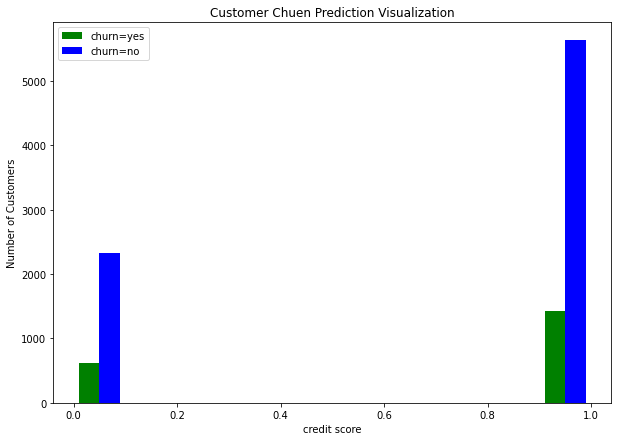

In [538]:
plt.figure(figsize=(10,7))
plt.xlabel('credit score')
plt.ylabel('Number of Customers')
plt.title('Customer Chuen Prediction Visualization')

plt.hist([creditcard_churn_yes,creditcard_churn_no],color=['green','blue'],label=['churn=yes','churn=no'])
plt.legend()
plt.show()

In [539]:
estimatedsalary_churn_yes=df[df['churn']==1]['estimated_salary']
estimatedsalary_churn_no=df[df['churn']==0]['estimated_salary']

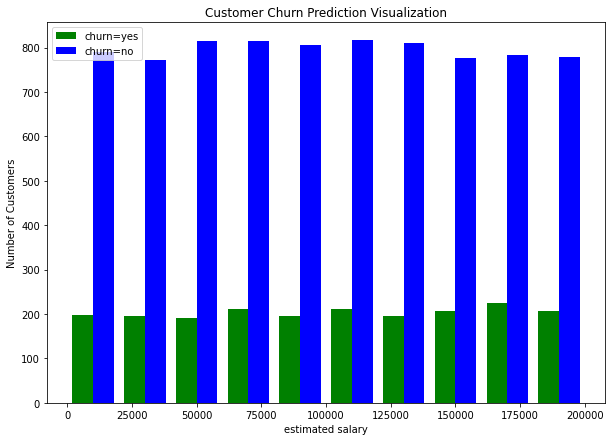

In [540]:
plt.figure(figsize=(10,7))
plt.xlabel('estimated salary')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([estimatedsalary_churn_yes,estimatedsalary_churn_no],color=['green','blue'],label=['churn=yes','churn=no'])
plt.legend()
plt.show()

In [541]:
country_churn_yes=df[df['churn']==1]['country']
country_churn_no=df[df['churn']==0]['country']

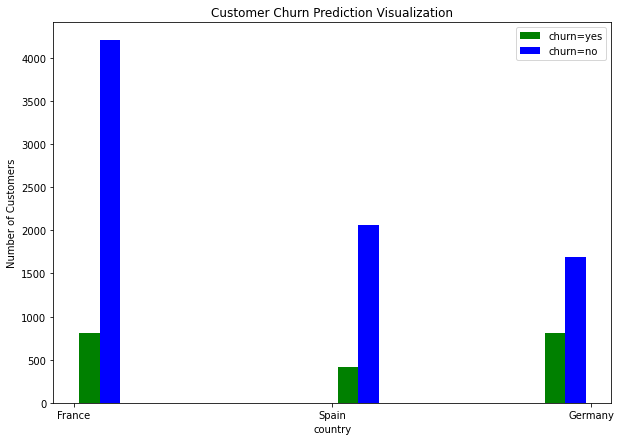

In [542]:
plt.figure(figsize=(10,7))
plt.xlabel('country')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([country_churn_yes,country_churn_no],color=['green','blue'],label=['churn=yes','churn=no'])
plt.legend()
plt.show()

In [543]:
age_churn_yes=df[df['churn']==1]['age']
age_churn_no=df[df['churn']==0]['age']

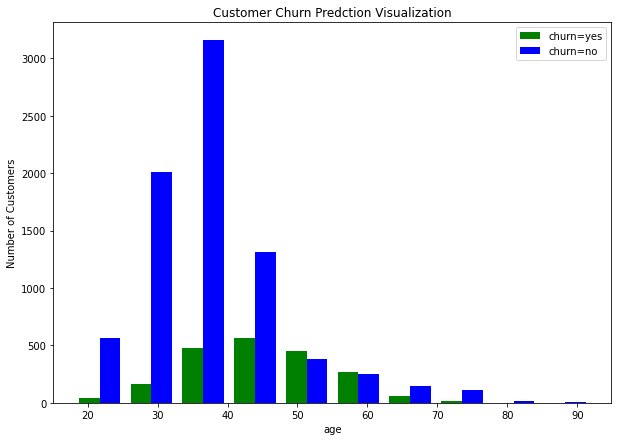

In [544]:
plt.figure(figsize=(10,7))
plt.xlabel('age')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Predction Visualization')

plt.hist([age_churn_yes,age_churn_no],color=['green','blue'],label=['churn=yes','churn=no'])
plt.legend()
plt.show()

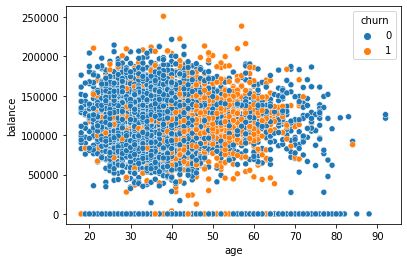

In [545]:
sns.scatterplot(data=df,x='age',y='balance',hue='churn')
plt.show()

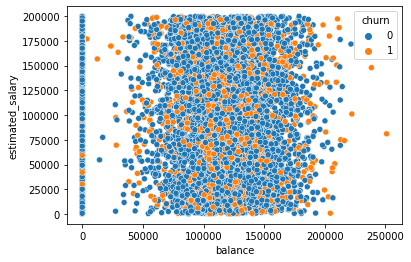

In [546]:
sns.scatterplot(data=df,x='balance',y='estimated_salary',hue='churn')
plt.show()

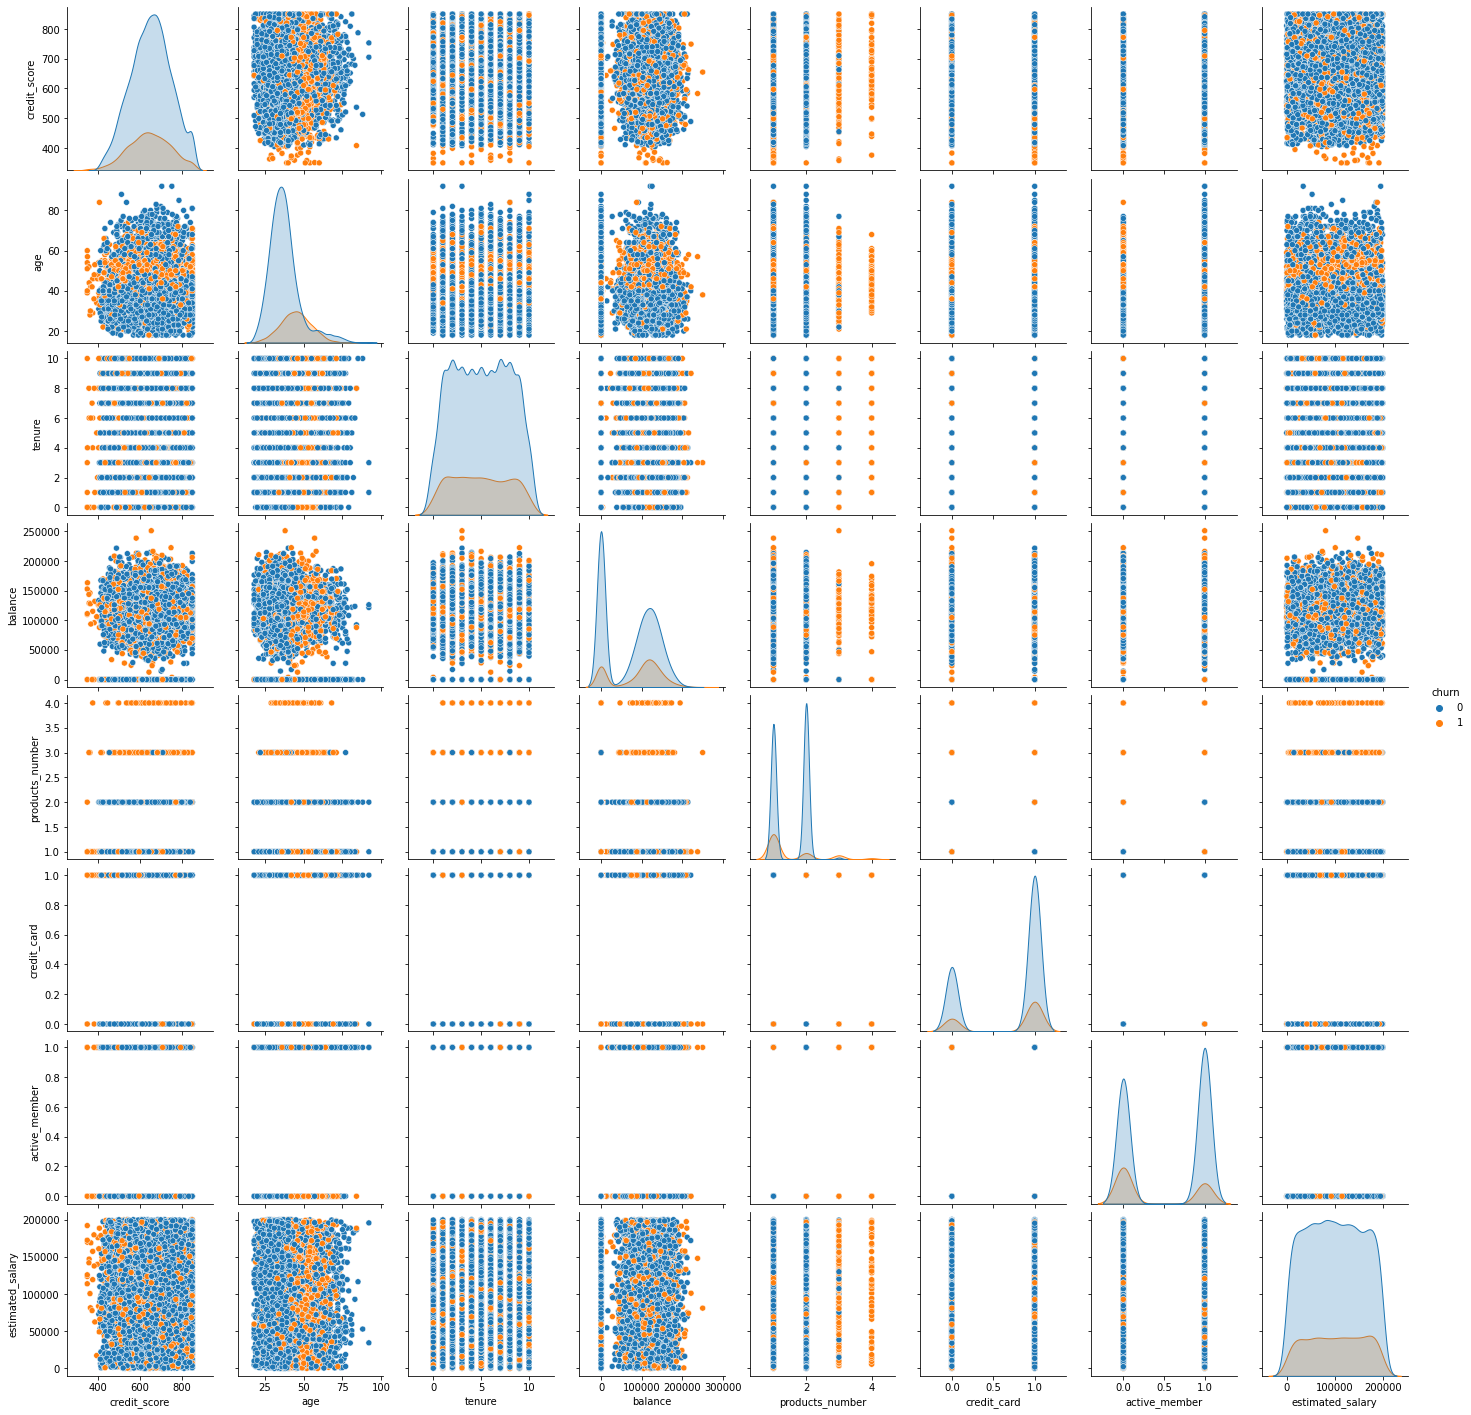

In [547]:
sns.pairplot(data=df,hue='churn')
plt.show()

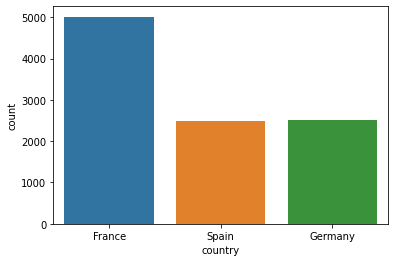

In [548]:
sns.countplot(data=df,x='country')
plt.show()

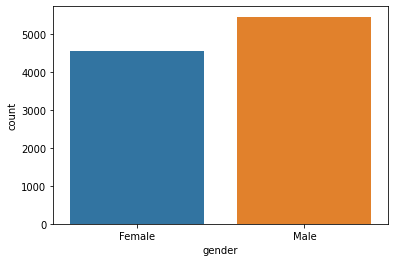

In [549]:
sns.countplot(data=df,x='gender')
plt.show()

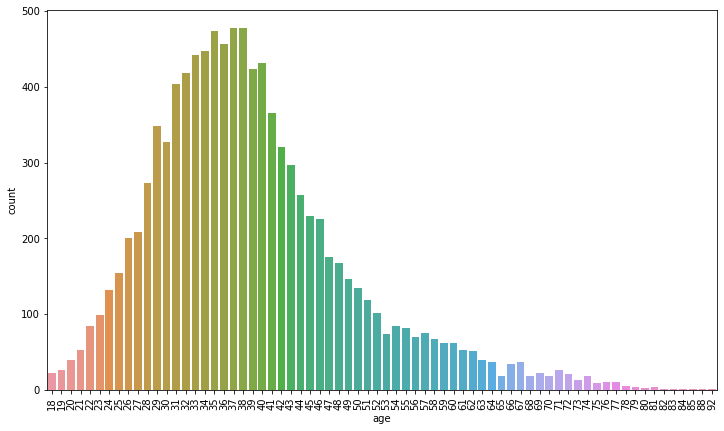

In [550]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='age')
plt.show()

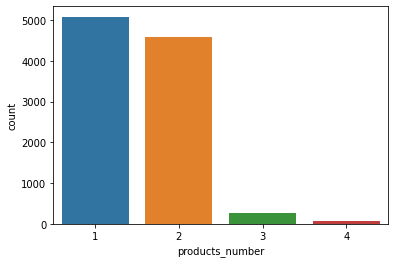

In [551]:
sns.countplot(data=df,x='products_number')
plt.show()

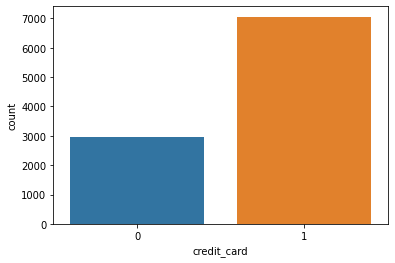

In [552]:
sns.countplot(data=df,x='credit_card')
plt.show()

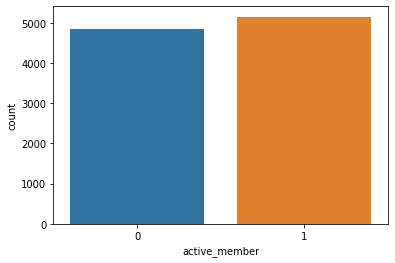

In [553]:
sns.countplot(data=df,x='active_member')
plt.show()

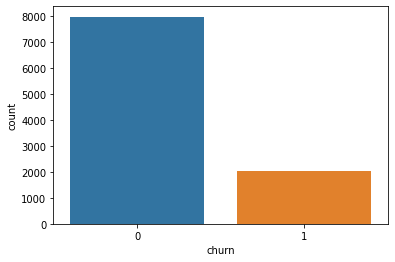

In [554]:
sns.countplot(data=df,x='churn')
plt.show()

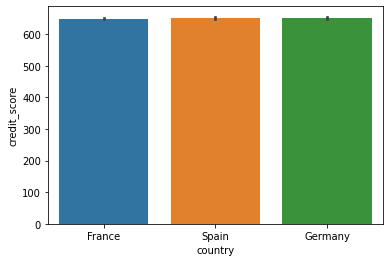

In [555]:
sns.barplot(data=df,x='country',y='credit_score')
plt.show()

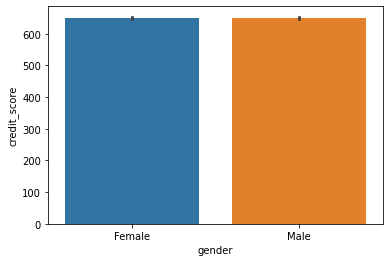

In [556]:
sns.barplot(data=df,x='gender',y='credit_score')
plt.show()

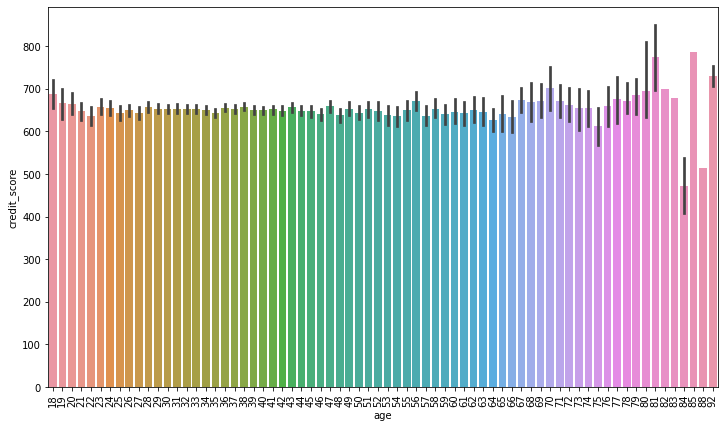

In [557]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='age',y='credit_score')
plt.show()

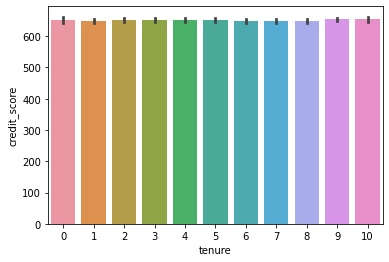

In [558]:
sns.barplot(data=df,x='tenure',y='credit_score')
plt.show()

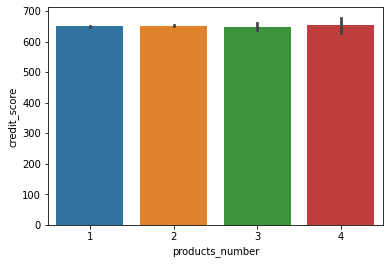

In [559]:
sns.barplot(data=df,x='products_number',y='credit_score')
plt.show()

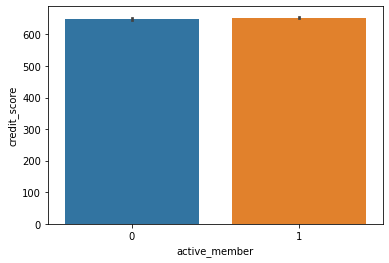

In [560]:
sns.barplot(data=df,x='active_member',y='credit_score')
plt.show()

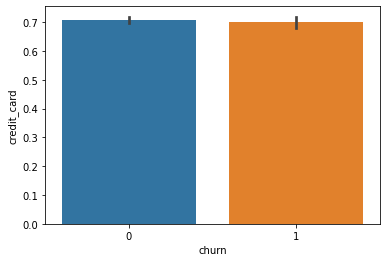

In [561]:
sns.barplot(data=df,x='churn',y='credit_card')
plt.show()

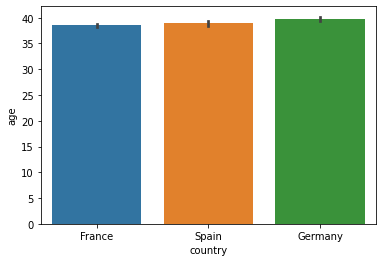

In [562]:
sns.barplot(data=df,x='country',y='age')
plt.show()

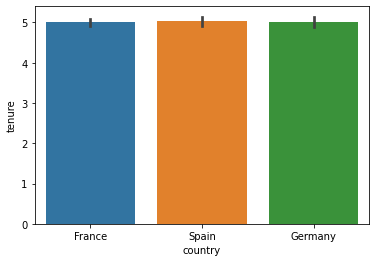

In [563]:
sns.barplot(data=df,x='country',y='tenure')
plt.show()

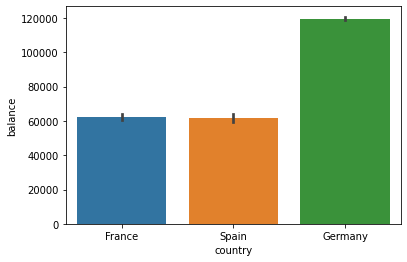

In [564]:
sns.barplot(data=df,x='country',y='balance')
plt.show()

In [565]:
df[df['country']=='Germany']['balance'].mean()

119730.1161339179

In [566]:
df[df['country']=='Spain']['balance'].mean()

61818.14776342349

In [567]:
df[df['country']=='France']['balance'].mean()

62092.63651575588

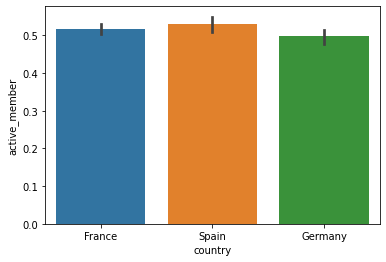

In [568]:
sns.barplot(data=df,x='country',y='active_member')
plt.show()

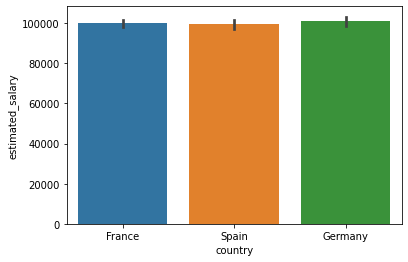

In [569]:
sns.barplot(data=df,x='country',y='estimated_salary')
plt.show()

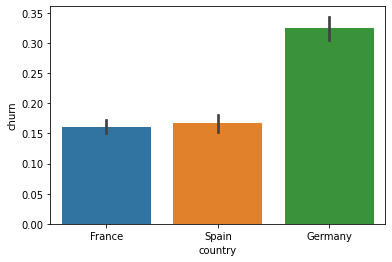

In [570]:
sns.barplot(data=df,x='country',y='churn')
plt.show()

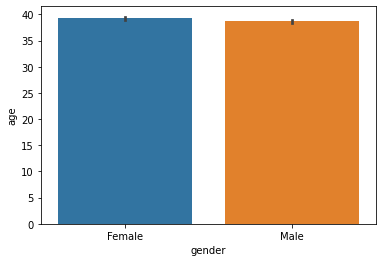

In [571]:
sns.barplot(data=df,x='gender',y='age')
plt.show()

In [572]:
df[df['gender']=='Female']['age'].mean()

39.238388729914156

In [573]:
df[df['gender']=='Male']['age'].mean()

38.658237126626354

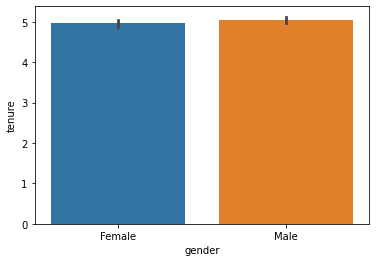

In [574]:
sns.barplot(data=df,x='gender',y='tenure')
plt.show()

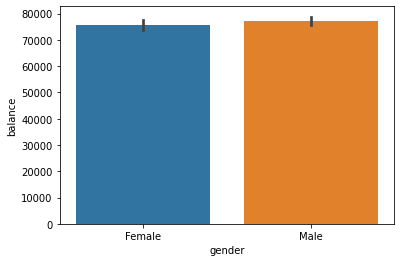

In [575]:
sns.barplot(data=df,x='gender',y='balance')
plt.show()

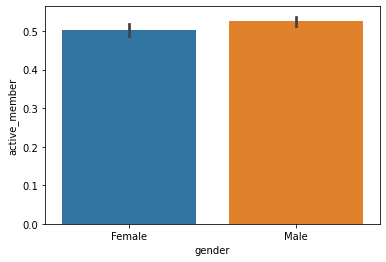

In [576]:
sns.barplot(data=df,x='gender',y='active_member')
plt.show()

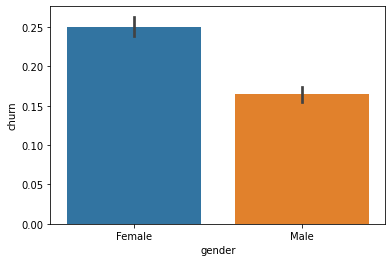

In [577]:
sns.barplot(data=df,x='gender',y='churn')
plt.show()

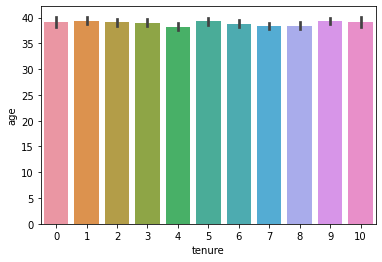

In [578]:
sns.barplot(data=df,x='tenure',y='age')
plt.show()

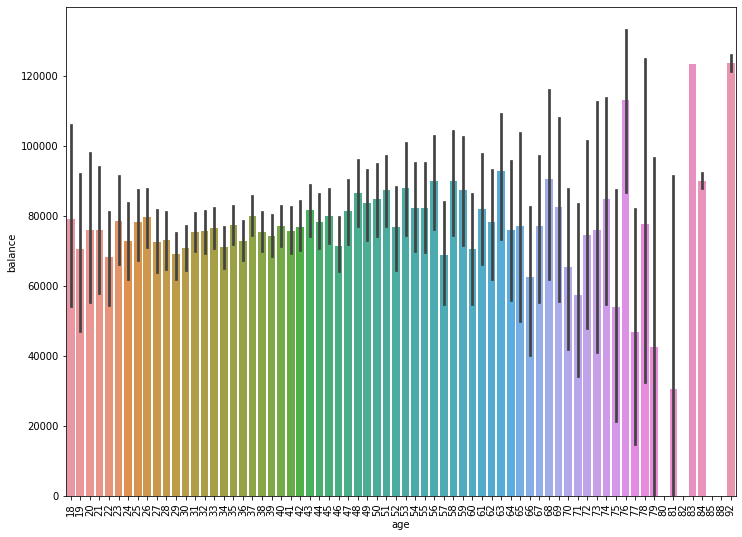

In [579]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.barplot(data=df,x='age',y='balance')
plt.show()

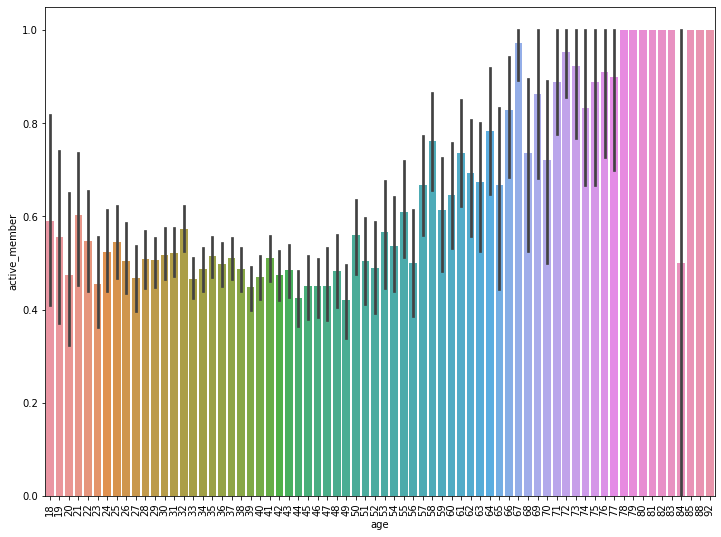

In [580]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.barplot(data=df,x='age',y='active_member')
plt.show()

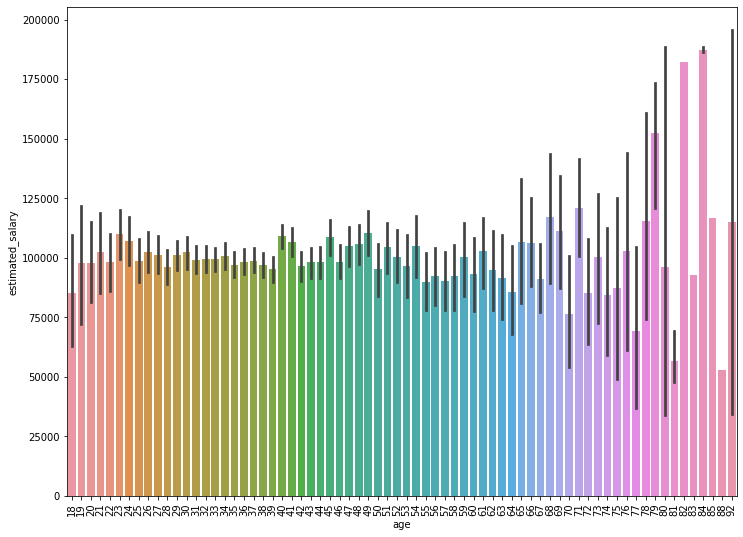

In [581]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.barplot(data=df,x='age',y='estimated_salary')
plt.show()

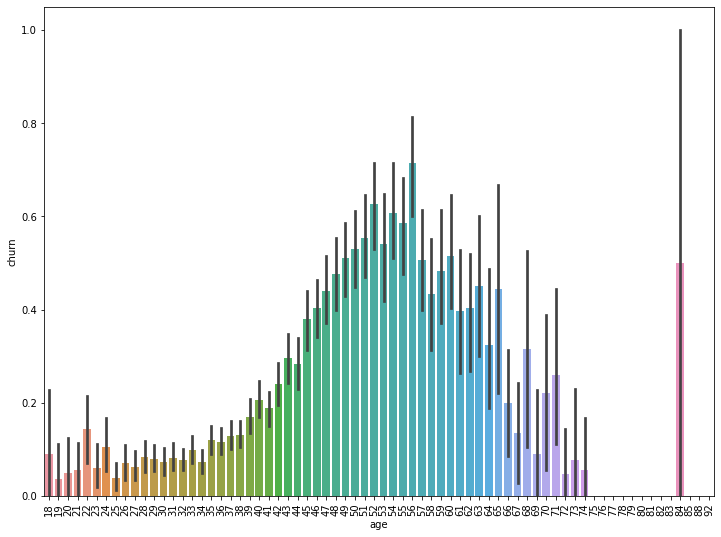

In [582]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.barplot(data=df,x='age',y='churn')
plt.show()

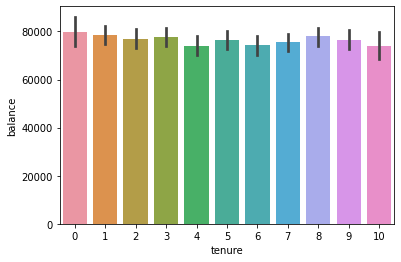

In [583]:
sns.barplot(data=df,x='tenure',y='balance')
plt.show()

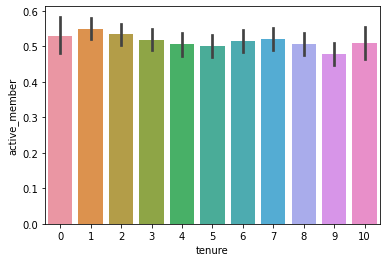

In [584]:
sns.barplot(data=df,x='tenure',y='active_member')
plt.show()

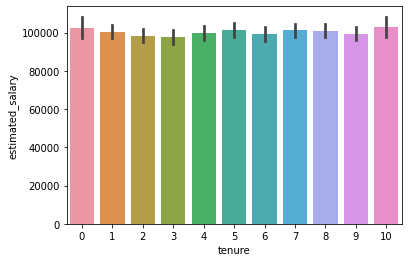

In [585]:
sns.barplot(data=df,x='tenure',y='estimated_salary')
plt.show()

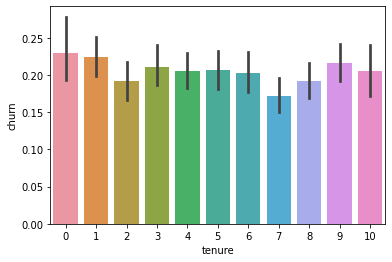

In [586]:
sns.barplot(data=df,x='tenure',y='churn')
plt.show()

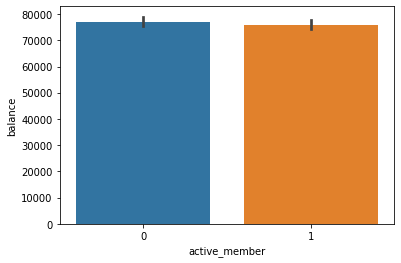

In [587]:
sns.barplot(data=df,x='active_member',y='balance')
plt.show()

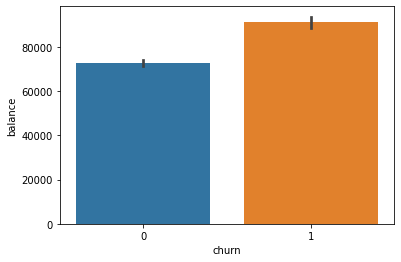

In [588]:
sns.barplot(data=df,x='churn',y='balance')
plt.show()

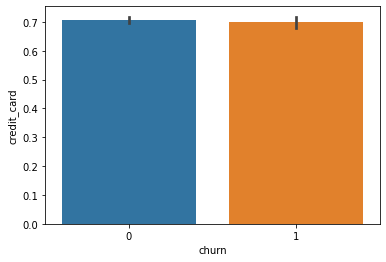

In [589]:
sns.barplot(data=df,x='churn',y='credit_card')
plt.show()

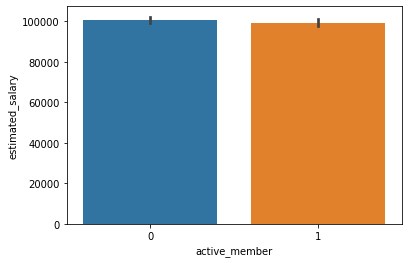

In [590]:
sns.barplot(data=df,x='active_member',y='estimated_salary')
plt.show()

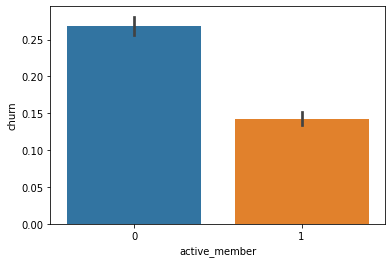

In [591]:
sns.barplot(data=df,x='active_member',y='churn')
plt.show()

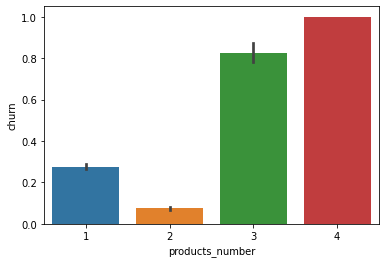

In [592]:
sns.barplot(data=df,x='products_number',y='churn')
plt.show()

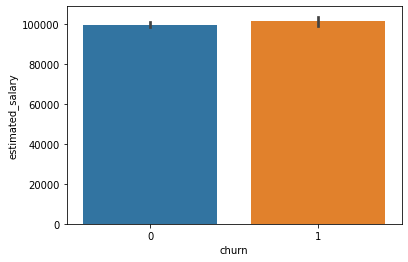

In [593]:
sns.barplot(data=df,x='churn',y='estimated_salary')
plt.show()

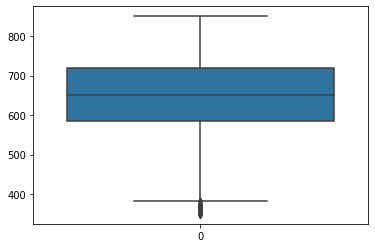

In [594]:
sns.boxplot(df['credit_score'])
plt.show()

In [595]:
df[df['credit_score']<400]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1201,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


In [596]:
df=df[df['credit_score']>400]

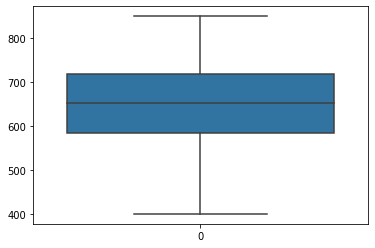

In [597]:
sns.boxplot(df['credit_score'])
plt.show()

In [598]:
df.shape

(9981, 11)

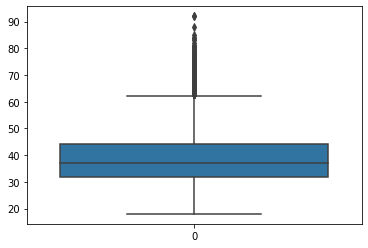

In [599]:
sns.boxplot(df['age'])
plt.show()

In [600]:
df[df['age']>59]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
42,556,France,Female,61,2,117419.35,1,1,1,94153.83,0
44,660,Spain,Female,61,5,155931.11,1,1,1,158338.39,0
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
...,...,...,...,...,...,...,...,...,...,...,...
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9879,486,Germany,Male,62,9,118356.89,2,1,0,168034.83,1
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0
9897,678,Spain,Female,61,8,0.00,2,1,1,159938.82,0


In [601]:
df=df[df['age']<59]

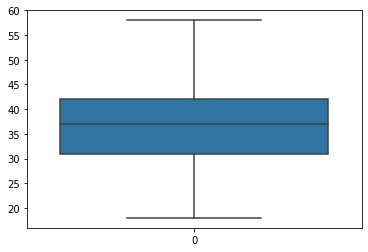

In [603]:
sns.boxplot(df['age'])
plt.show()

In [604]:
df.shape

(9394, 11)

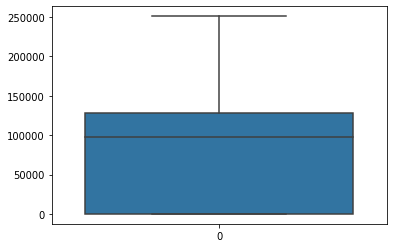

In [605]:
sns.boxplot(df['balance'])
plt.show()

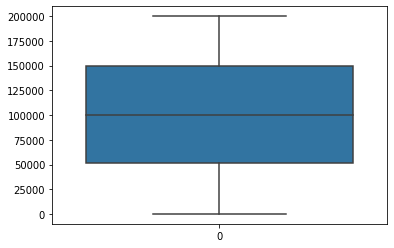

In [606]:
sns.boxplot(df['estimated_salary'])
plt.show()

In [607]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [608]:
df.duplicated().sum()

0

In [609]:
print_unique_col_values(df)

country:['France' 'Spain' 'Germany']
gender:['Female' 'Male']


In [610]:
df['gender']=df['gender'].replace({'Female':0,'Male':1})

In [611]:
df['gender'].value_counts()

1    5130
0    4264
Name: gender, dtype: int64

In [612]:
df=pd.get_dummies(data=df,columns=['country'])

In [613]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [614]:
columns_to_scale=['credit_score','age','tenure','balance','products_number','estimated_salary']

In [615]:
scaler=MinMaxScaler()

In [616]:
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])

In [617]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,0.485523,0,0.600,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.461024,0,0.575,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.224944,0,0.600,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.663697,0,0.525,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000000,0,0.625,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [618]:
X=df.drop('churn',axis=1)
y=df['churn']

In [619]:
X

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
0,0.485523,0,0.600,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.461024,0,0.575,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.224944,0,0.600,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.663697,0,0.525,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000000,0,0.625,0.2,0.500246,0.000000,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.824053,1,0.525,0.5,0.000000,0.333333,1,0,0.481341,1,0,0
9996,0.256125,1,0.425,1.0,0.228657,0.000000,1,1,0.508490,1,0,0
9997,0.685969,0,0.450,0.7,0.000000,0.000000,0,1,0.210390,1,0,0
9998,0.826281,1,0.600,0.3,0.299226,0.333333,1,0,0.464429,0,1,0


In [620]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 9394, dtype: int64

In [621]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [622]:
X_train.shape

(7515, 12)

In [624]:
X_test.shape

(1879, 12)

In [627]:
len(X_train.columns)

12

In [641]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_train,y_train,epochs=30)

Epoch 1/30
235/235 [==============================] - 2s 2ms/step - loss: 0.4819 - accuracy: 0.7999
Epoch 2/30
235/235 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8152
Epoch 3/30
235/235 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8265
Epoch 4/30
235/235 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8289
Epoch 5/30
235/235 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8313
Epoch 6/30
235/235 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8306
Epoch 7/30
235/235 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8325
Epoch 8/30
235/235 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8375
Epoch 9/30
235/235 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8363
Epoch 10/30
235/235 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8419

In [642]:
model.evaluate(X_test,y_test)

59/59 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8606


[0.33670148253440857, 0.860564112663269]

In [643]:
yp=model.predict(X_test)

59/59 [==============================] - 0s 2ms/step


In [646]:
yp[:10]

array([[0.9478521 ],
       [0.03972092],
       [0.03240306],
       [0.02145674],
       [0.12159098],
       [0.9964721 ],
       [0.9007646 ],
       [0.13111019],
       [0.11520497],
       [0.01129724]], dtype=float32)

In [647]:
y_test[:10]

2351    1
8827    0
1830    0
6832    0
9260    0
8396    1
9689    0
4429    1
4593    0
9704    0
Name: churn, dtype: int64

In [648]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [649]:
y_pred[:10]

[1, 0, 0, 0, 0, 1, 1, 0, 0, 0]

In [650]:
y_test[:10]

2351    1
8827    0
1830    0
6832    0
9260    0
8396    1
9689    0
4429    1
4593    0
9704    0
Name: churn, dtype: int64

In [651]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1628
           1       0.48      0.67      0.56       251

    accuracy                           0.86      1879
   macro avg       0.72      0.78      0.74      1879
weighted avg       0.88      0.86      0.87      1879



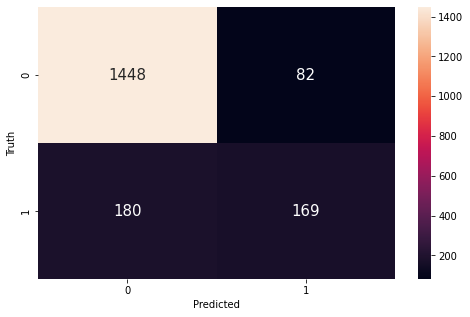

In [654]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='d',annot_kws={'size':15})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()